In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots, PlotConfig, save_factory, figure, legend, format_pizza_plots, COLORMAPS
from collections import Counter
from matplotlib.lines import Line2D
from aging.organization.dataframes import load_male_long_df, load_female_long_df, DF_PATHS
from tqdm import tqdm

In [2]:
def mm_norm_col(column):
    return (column - column.min()) / (column.max() - column.min())

In [3]:
cmm = COLORMAPS.ont_male
cmf = COLORMAPS.ont_female

m_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_males_raw_usage_df_beh_age.parquet').groupby(['age','mouse']).mean()
f_df =  pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_females_raw_usage_df_beh_age.parquet').groupby(['age','mouse']).mean()
f_df = f_df.query('mouse!="F4_03"')

In [4]:
# avarage per age or session
avg_m_df = m_df.groupby(['age']).mean()

# normalize the data
m_norm = mm_norm_col(m_df)
avg_m_norm = mm_norm_col(avg_m_df)

# sort syllable order by the average
syll_sort_m = (
    avg_m_norm.rolling(5, center=True, win_type="exponential")
    .mean(tau=1.5)
    .idxmax()
    .sort_values()
    .index
)

In [5]:
# get labels and data fot plottinh
data=avg_m_norm.copy()
data_labels = data.index.get_level_values('age').to_numpy()

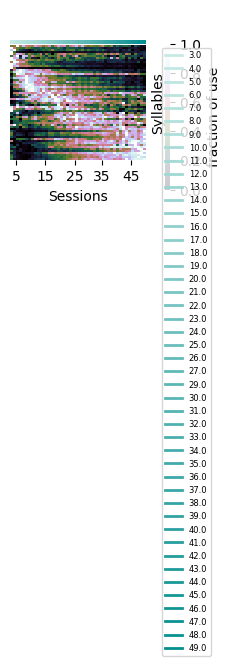

In [6]:
#colors for plotting
cmap2 = cmm
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='cubehelix'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

# plot
cg=sns.clustermap(
    data=data[syll_sort_m].T,
    cmap=seqmatcolor, 
    figsize=(2, 2),
    col_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
    cbar_kws={'label': 'fraction of use'}, 
    )
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap
# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)
ax.set_xlabel('Sessions')
ax.set_ylabel('Syllables')

# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [7]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig4"/ 'syll_over_time_avg_longv2_male_beh_age.pdf', bbox_inches='tight')

In [8]:
## Female

In [9]:
# avarage per age or session
avg_f_df = f_df.groupby(['age']).mean()

# normalize the data
f_norm = mm_norm_col(f_df)
avg_f_norm = mm_norm_col(avg_f_df)

# sort syllable order by the average
syll_sort_f = (
    avg_f_norm.rolling(5, center=True, win_type="exponential")
    .mean(tau=1.5)
    .idxmax()
    .sort_values()
    .index
)

In [10]:
# get labels and data fot plottinh
data = avg_f_norm.copy()
data_labels = data.index.get_level_values('age').to_numpy()

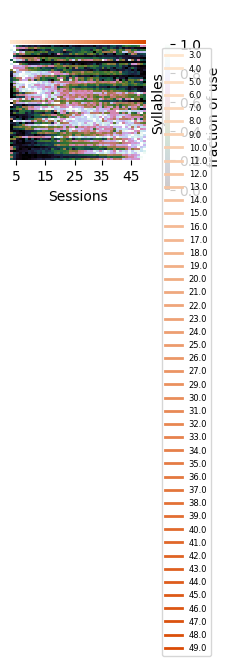

In [11]:
#colors for plotting
cmap2 = cmf
ages = np.unique(data_labels)
colors = np.int_(np.arange(0, 256, 256/len(ages)))
seqmatcolor='cubehelix'

# create age labels colors
lines=[]
counter = Counter(data_labels)
sorted(counter.items())
a=np.array([*counter.values()])

color_mat=[]
n=0
for i,c in enumerate(colors):
    for j in range(a[i]):
        color_mat.append(cmap2(c))

# plot
cg=sns.clustermap(
    data=data[syll_sort_f].T,
    cmap=seqmatcolor, 
    figsize=(2, 2),
    col_colors=color_mat,
    cbar_pos=(1.02, 0.025, 0.025, .73),
    col_cluster=False,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
    cbar_kws={'label': 'fraction of use'}, 
    )
cg.ax_row_dendrogram.set_visible(False)
ax = cg.ax_heatmap

# Desired tick labels
desired_ages = [5, 15, 25, 35, 45]
# Find the positions of the desired ages
tick_positions = [np.where(data_labels == age)[0][0] for age in desired_ages]
tick_labels = desired_ages

# Set x and y ticks and labels
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels)

ax.set_xlabel('Sessions')
ax.set_ylabel('Syllables')

# legend
for i,c in enumerate(colors):
        lines.append(Line2D([0], [0], color=cmap2(c), lw=2))
plt.legend(handles=lines,labels=list(ages),bbox_to_anchor=(10, 1),loc='upper right',fontsize=6)
plt.show()

In [12]:
c = PlotConfig()
cg.savefig(c.dana_save_path / "fig4"/ 'syll_over_time_avg_longv2_female_beh_age.pdf', bbox_inches='tight')